First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

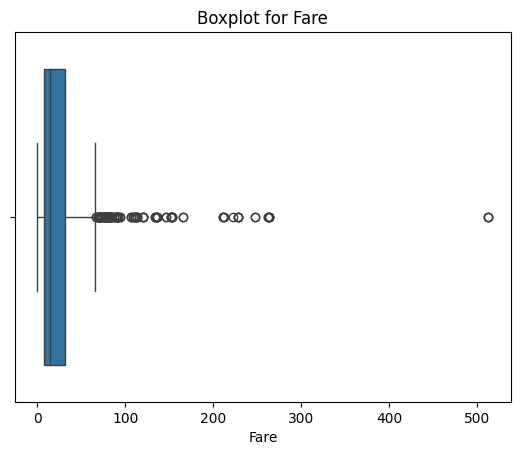


Original data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

Cleaned dataset saved as 'titanic_cleaned.csv'


In [6]:
# Lab Manual 1: Data Cleaning and Preprocessing using Titanic Dataset

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Display plots inside the notebook
%matplotlib inline

# Step 2: Load the Dataset from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Handling Missing Data
print("\nMissing values in each column before cleaning:")
print(df.isnull().sum())

# Fill 'Age' with mean, 'Embarked' with mode, and drop 'Cabin' due to high missing rate
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['Cabin'])

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Step 4: Handling Duplicate Data
print("\nNumber of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

# Step 5: Handling Outliers in 'Fare'
sns.boxplot(x=df['Fare'])
plt.title('Boxplot for Fare')
plt.show()

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['Fare'] = df['Fare'].clip(lower, upper)

# Step 6: Data Type Conversion
print("\nOriginal data types:")
print(df.dtypes)

df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Name'] = df['Name'].astype(str)
df['Ticket'] = df['Ticket'].astype(str)

# Step 7: Feature Engineering

# Normalize 'Age' and 'Fare'
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Encode 'Sex' and 'Embarked'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])          # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # S=2, C=0, Q=1

# Optional: drop non-essential columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Step 8: Save the Cleaned Dataset
df.to_csv("titanic_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'titanic_cleaned.csv'")

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64